In [1]:
import polars as pl
import plotnine as pn

In [154]:
(era := pl.read_csv("./data/league_wide_ERA.csv"))
era.head()

lgID,yearID,total_runs_allowed,total_outs,ERA,DH_allowed
str,i64,i64,i64,f64,str
"""AL""",1985,10317,60552,4.600327,"""DH"""
"""NL""",2012,11037,69211,4.30566,"""No DH"""
"""AL""",1979,10527,60155,4.724944,"""DH"""
"""NL""",1927,5657,33023,4.625231,"""No DH"""
"""AL""",1999,11853,60230,5.313482,"""DH"""


In [155]:
(slugging := pl.read_csv("./data/league_wide_slugging_pct.csv"))
slugging.head()

lgID,yearID,Total_1B,Total_2B,Total_3B,Total_HR,Total_AB,Slugging_Pct,DH_allowed
str,i64,i64,i64,i64,i64,i64,f64,str
"""NL""",2013,20768,4039,424,2157,82690,0.468569,"""No DH"""
"""NA""",1874,5224,634,194,40,19104,0.378664,"""No DH"""
"""NL""",1949,11207,1865,370,935,42711,0.463276,"""No DH"""
"""AL""",1928,11835,2202,620,483,42144,0.475299,"""No DH"""
"""AL""",1955,10802,1574,338,961,41817,0.449769,"""No DH"""


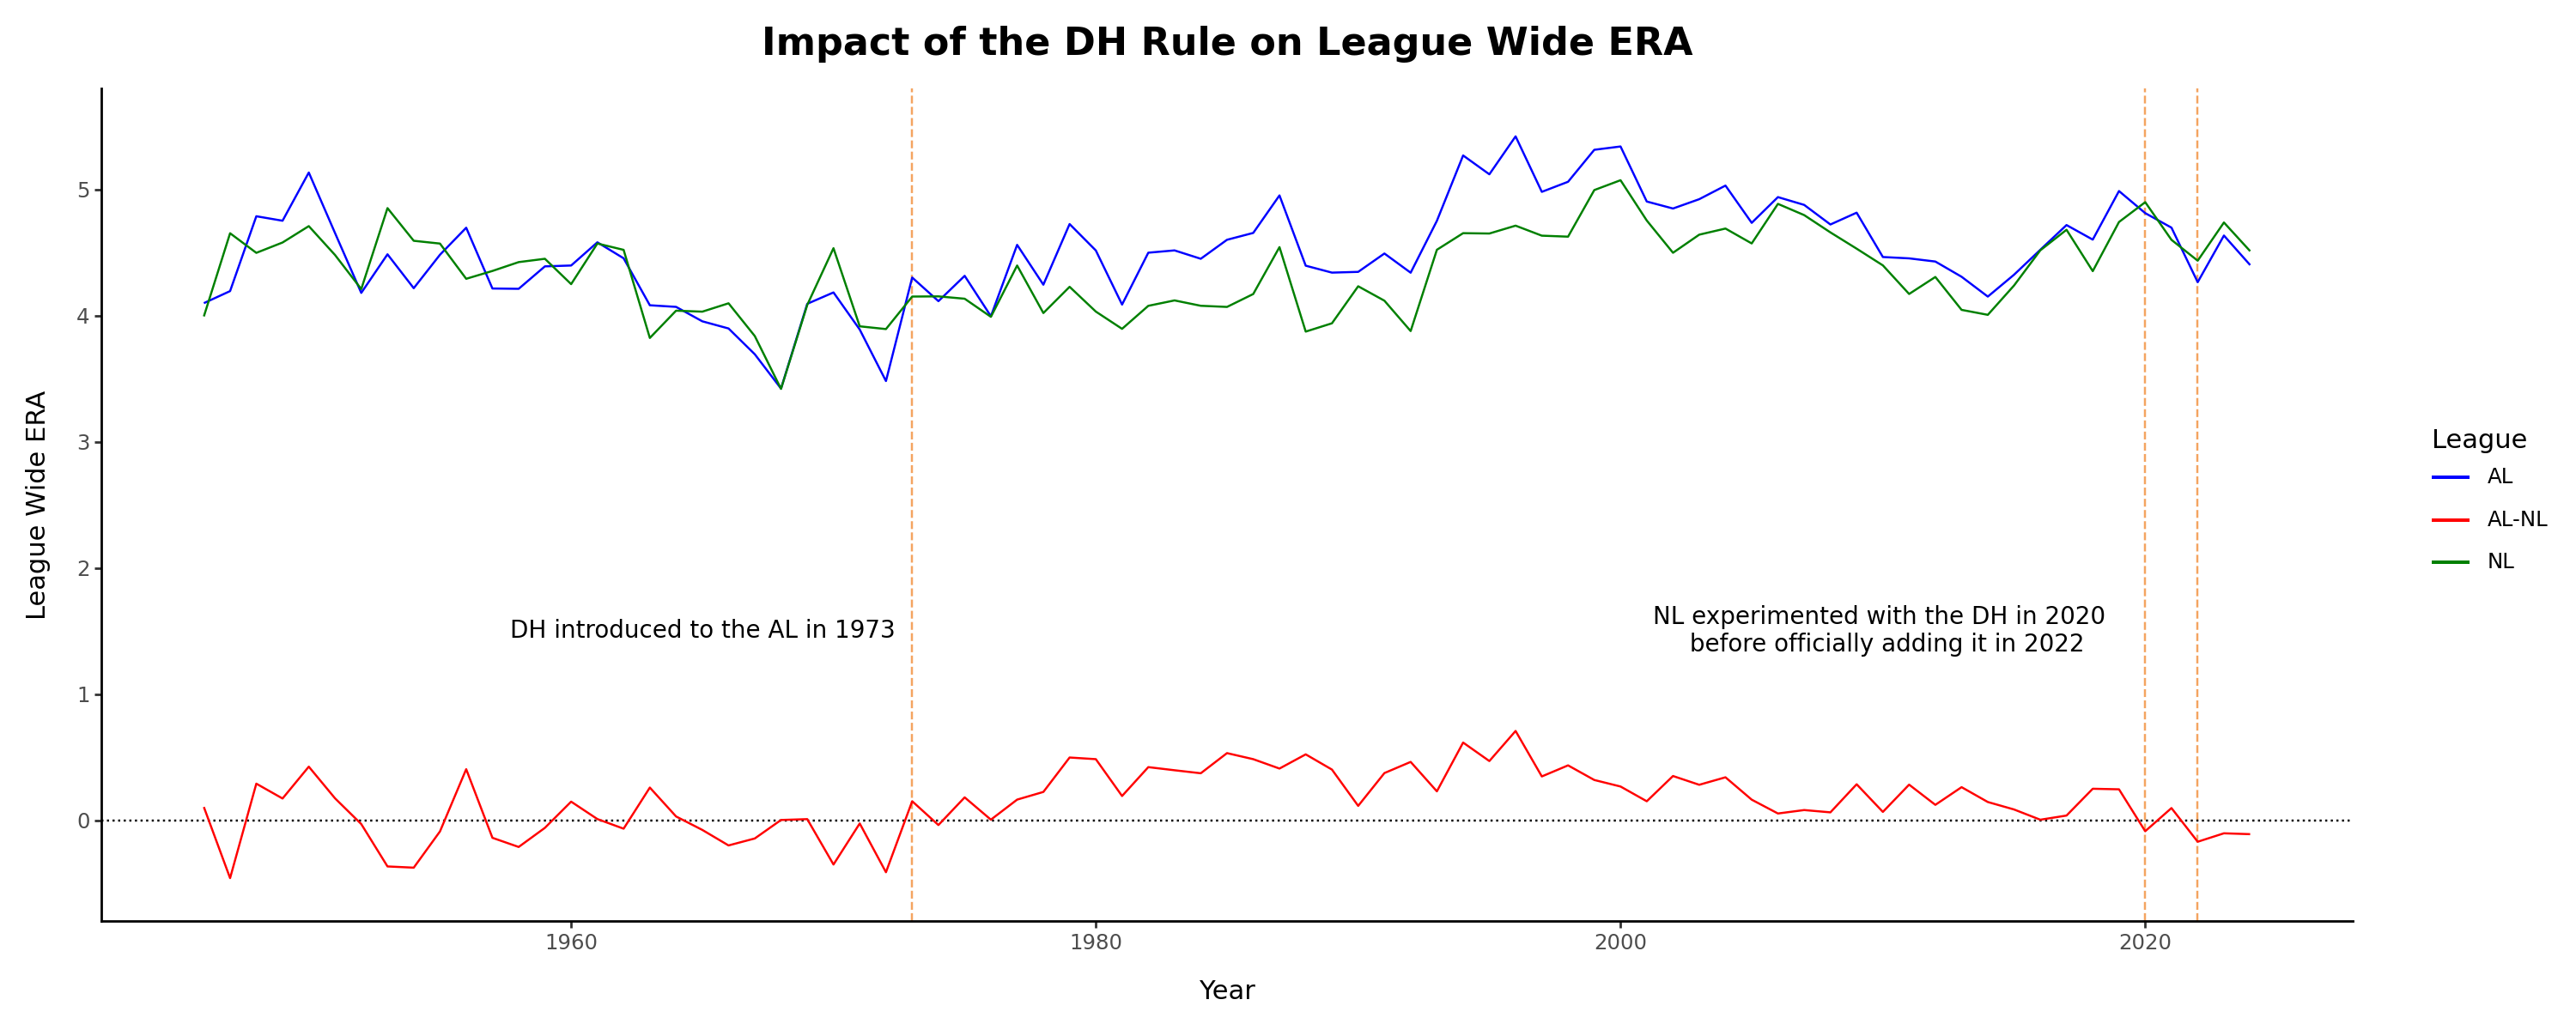

In [161]:
from plotnine import ggplot, geom_line, aes, geom_hline, geom_vline, theme_classic, scale_color_manual, annotate, theme, scale_y_continuous, ggtitle
from plotnine.themes.elements import element_text

era_plot = (ggplot(era.filter(pl.col("yearID") >= 1946)
    .pivot(on="lgID",
           index="yearID",
           values="ERA")
    .with_columns((pl.col("AL") - pl.col("NL")).alias("AL-NL"))
    .unpivot(index="yearID", variable_name = "League", value_name="League Wide ERA")
    .rename({"yearID" : "Year"})
 )
 + aes(x = "Year", y = "League Wide ERA", color = "League")
 + geom_vline(xintercept=1973, linetype="dashed", color = "sandybrown")
 + geom_vline(xintercept=2020, linetype="dashed", color = "sandybrown")
 + geom_vline(xintercept=2022, linetype="dashed", color = "sandybrown")
 + geom_hline(yintercept=0, linetype = "dotted")
 + annotate("text", x=1965, y=1.5, label="DH introduced to the AL in 1973", size=10)
 + annotate("text", x=2010, y=1.5, label="NL experimented with the DH in 2020 \n before officially adding it in 2022", size=10)
 + geom_line()
 + scale_color_manual(["blue", "red", "green"])
 + scale_y_continuous(limits=(-0.5, 5.5), breaks=[0, 1, 2, 3, 4, 5])
 + ggtitle("Impact of the DH Rule on League Wide ERA")
 + theme_classic()
 + theme(figure_size=(15, 6), plot_title=element_text(size=16, weight="bold"))
)
era_plot

In [163]:
era_plot.save("./img/era_plot.png", dpi=300, width=15, height=6)

C:\Users\ol3399hi\AppData\Local\anaconda3\envs\polars\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 15 x 6 in image.
C:\Users\ol3399hi\AppData\Local\anaconda3\envs\polars\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ./img/era_plot.png


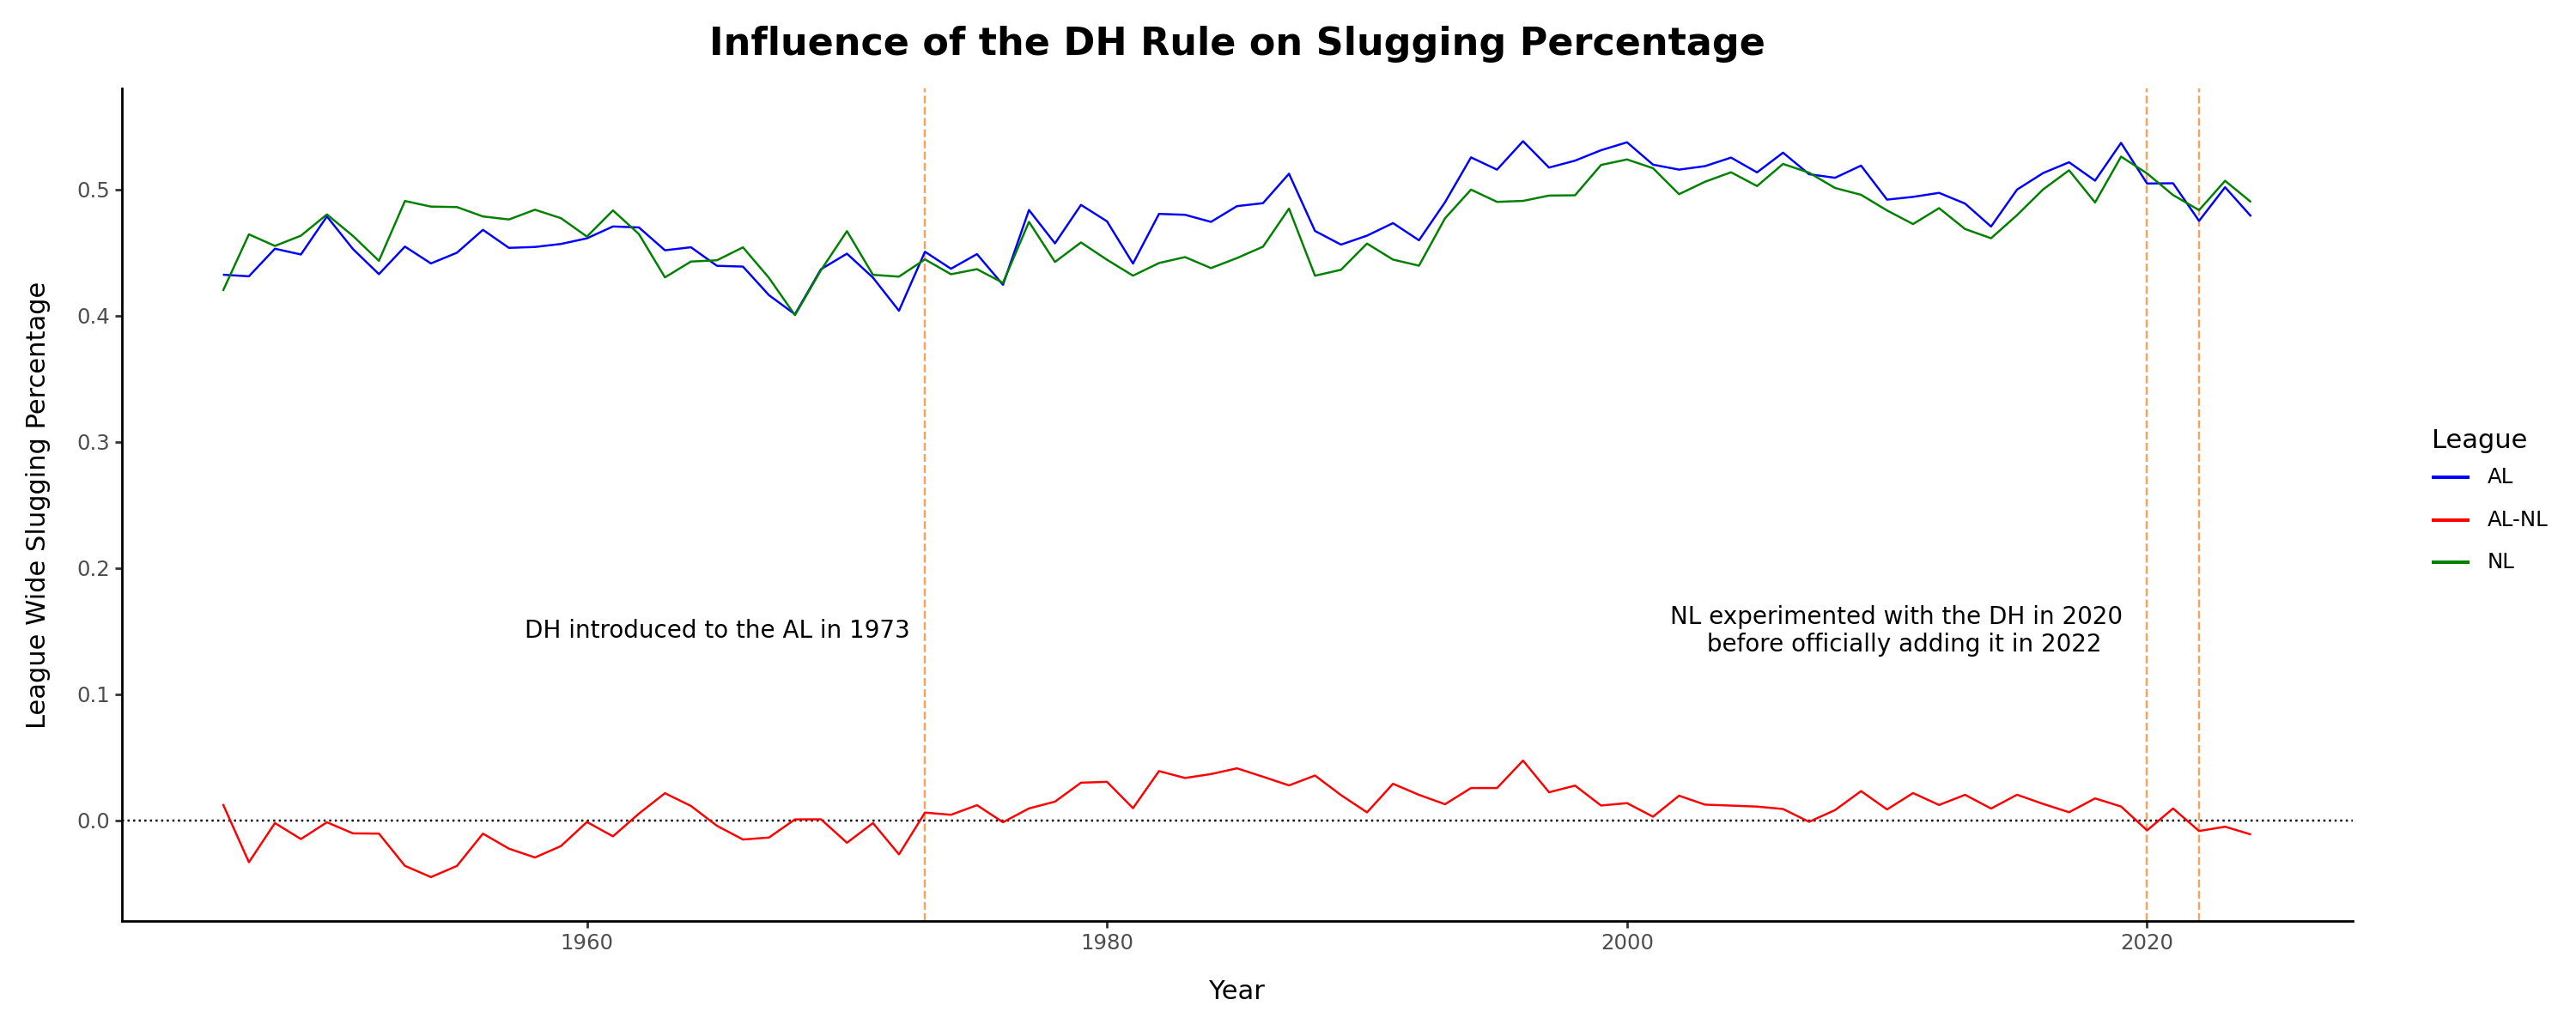

In [162]:
from plotnine import ggplot, geom_line, aes, geom_hline, geom_vline, theme_classic, scale_color_manual, annotate, theme, scale_y_continuous
from plotnine.themes.elements import element_text

slg_plot = (ggplot(slugging.filter(pl.col("yearID") >= 1946)
    .pivot(on="lgID",
           index="yearID",
           values="Slugging_Pct")
    .with_columns((pl.col("AL") - pl.col("NL")).alias("AL-NL"))
    .unpivot(index="yearID", variable_name = "League", value_name="League Wide Slugging Percentage")
    .rename({"yearID" : "Year"})
  )
 + aes(x = "Year", y = "League Wide Slugging Percentage", color = "League")
 + geom_vline(xintercept=1973, linetype="dashed", color = "sandybrown")
 + geom_vline(xintercept=2020, linetype="dashed", color = "sandybrown")
 + geom_vline(xintercept=2022, linetype="dashed", color = "sandybrown")
 + geom_hline(yintercept=0, linetype = "dotted")
 + annotate("text", x=1965, y=0.15, label="DH introduced to the AL in 1973", size=10)
 + annotate("text", x=2010.5, y=0.15, label="NL experimented with the DH in 2020 \n before officially adding it in 2022", size=10)
 + geom_line()
 + scale_y_continuous(limits=(-0.05, 0.55), breaks=[0, 0.1, 0.2, 0.3, 0.4, 0.5])
 + scale_color_manual(["blue", "red", "green"])
 + ggtitle("Influence of the DH Rule on Slugging Percentage")
 + theme_classic()
 + theme(figure_size=(15, 6), plot_title=element_text(size=16, weight="bold"))
)
slg_plot

In [164]:
slg_plot.save("./img/slg_plot.png", dpi=300, width=15, height=6)

C:\Users\ol3399hi\AppData\Local\anaconda3\envs\polars\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 15 x 6 in image.
C:\Users\ol3399hi\AppData\Local\anaconda3\envs\polars\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ./img/slg_plot.png
